In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [39]:
# right hand side of the equation u' = -u^2
f = lambda x : - x**2

# update step in euler's method
euler_step  = lambda v, k : v + k*f(v)

# euler method with step size k
def euler_method(k, n, u0):
    n = int(1/k)
    u = np.zeros([n])
    u[0] = u0
    for i in range(1,n):
        u[i] = euler_step(u[i-1], k)
    return u

# exact solution to u' = -u^2 with u(0) = 1
true_sol = lambda t : 1/(t+1)

In [40]:
# step sizes
K = [0.1, 0.05, 0.025, 0.0125]
U = []
# compute solutions for each step size
for k in K:
    U.append(euler_method(k, int(1/k) - 1 , 1))

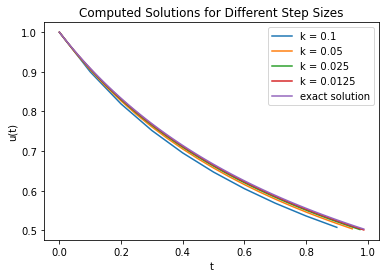

In [43]:
# array of grid points for different step sizes
grid_points = []
for k in K:
    grid_points.append([i*k for i in range(int(1/k))])

# plot computed solutions
for i in range(4):
    plt.plot(grid_points[i], U[i], label = "k = " + str(K[i]))

# plot true solution
plt.plot(grid_points[3], [true_sol(i*K[3]) for i in range(int(1/K[3]))], label = "exact solution")

# set plot title, labels, etc.
plt.title("Computed Solutions for Different Step Sizes")
plt.ylabel("u(t)")
plt.xlabel("t")
plt.legend()
plt.savefig("hw5_plot.png")

In [44]:
# make a table of the error at t=1 for each step size
table = [["k", "u_n", "e_n" , "e_n/k"]]
for i in range(4):
    table.append([K[i], U[i][int(1/K[i])-1], np.abs(U[i][int(1/K[i])-1] - true_sol(1)) ,\
                  np.abs(U[i][int(1/K[i])-1] - true_sol(1))/K[i]])
print(tabulate(table))

------  ------------------  ---------------------  -------------------
k       u_n                 e_n                    e_n/k
0.1     0.507464945568206   0.007464945568205983   0.07464945568205983
0.05    0.5037954146570665  0.0037954146570664538  0.07590829314132908
0.025   0.5019089884366232  0.001908988436623238   0.07635953746492952
0.0125  0.5009568464365096  0.0009568464365096174  0.0765477149207694
------  ------------------  ---------------------  -------------------
